In [2422]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [2423]:
WIDTH = 500
HEIGHT = 128 # Must be power of 2

LOWER_BOUND = np.random.random()*(HEIGHT-150)
UPPER_BOUND = 100+np.random.random()*(HEIGHT-LOWER_BOUND-100)

print(LOWER_BOUND, UPPER_BOUND)

RFI_STRENGTH = 2
FRB_STRENGTH = 20

-20.81969557385625 104.08223483580548


In [2424]:
data = np.random.random((HEIGHT, WIDTH))*RFI_STRENGTH

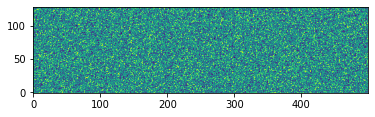

In [2425]:
plt.imshow(data, origin="lower")
plt.show()

In [2426]:
def draw_line(data, m, b):
    f = lambda x: m*x + b
    for x in range(WIDTH):
        y = f(x)
        draw_back(data, m, b, x, y, x+1, f(x+1))
    
    return data

In [2427]:
def draw_back(data, m, b, x0, y0, x1, y1):
    f_inv = lambda y: (y-b)/m
    while y0 <= y1 and f_inv(y1) < WIDTH:
        diff = x1 - f_inv(y0)-0.5
        val = np.random.random()*FRB_STRENGTH
        

        if diff > 0 and y0 < UPPER_BOUND and y0 > LOWER_BOUND:
            data[int(y0)][x0] = val
        elif y0 < UPPER_BOUND and y0 > LOWER_BOUND:
            data[int(y0)][x1] = val
        
        y0 += 1

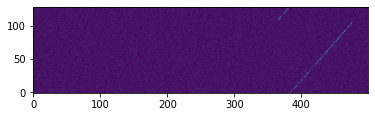

In [2428]:
m = math.tan(np.random.random()*math.pi/4 + math.pi/4)
x_intercept = np.random.random()*WIDTH
b = -m*x_intercept
data = draw_line(data, m, b)
plt.imshow(data, origin="lower")
plt.show()

In [2429]:
def line_detection(data):
    if len(data) == 1:
        return data[0]
    else:
        vert_sums = np.zeros((int(len(data)/2), WIDTH))
        diag_sums = np.zeros((int(len(data)/2), WIDTH))

        for x in range(0, WIDTH, 2):
            for y in range(0, int(len(data)/2), 2):
                if not (y % 2):
                    vert_sums[int(y/2)][x] = data[y][x] + data[y+1][x]

                    if(x < WIDTH-1):
                        diag_sums[int(y/2)][x] = data[y][x] + data[y+1][x+1]

        return line_detection(vert_sums) + line_detection(diag_sums)

In [2430]:
plt.plot(line_detection(data))
plt.show()

TypeError: Invalid shape (500,) for image data